# Exploring Different Fitness / Selection Criterion

Goal 1: Implement surviving parents alongside reproducing population. Up until now, we have been selecting genes at random from the best 50% of the population. So the next generation was all children with an amalgam of genes from the parent generation. Now we will implement survivors. These are solutions in our population who not only have the opportunity to reproduce, but they will survive intact to the next generation. This will be a small subsample of the best of the best in out population maybe the top 10%. 

Goal 2: Test different ratios for the reproducing population and carryover population. Default is use the best 50% to reproduce and 10% to survive, what do other ratios look like? Which one works best/should we use for our model? How does this affect diversity vs accuracy?

Goal 3: Implement the "low-ranking chimp." In hierarchical chimpanzee society, it is mainly the "Alpha" males who mate with the females of the group. However, the lower ranking males do, on occasion reproduce too. I think it would be interesting to see if implementing a low probability chance that one or several of the lowest ranking individuals pass on their genes would affect the model. I predict that it will be some sort of 

In [9]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../ExplorationVsExploitation')  # Replace '/path/to/EVO_BASE' with the actual path to the module
from DeepFitness import LogisticRegression, EvolutionOptimizer, DeepNeuralNetwork
from fitness import FitnessOptimizer
import torch
import numpy as np
import time
import random
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

In [3]:
def accuracy(model, X, y):
    device = model.w.device if model.w is not None else torch.device("cpu")
    X, y = X.to(device), y.to(device)
    y_pred = model.predict(X)
    return (y_pred == y).float().mean().item()


In [ ]:
# X, y = classification_data(p_dims=200, noise=0.2, n_points=5000)
# LR = LogisticRegression()
# opt = FitnessOptimizer(LR)
# LR.set_optimizer(opt)
# opt.set_mutation_rate(0.5)
# opt.set_population_size(30)
# opt.set_fitness_ratio(0.25)
# opt.mutation_type = "grad"

# print(f'Training on {opt.device}')

# device = opt.device
# X, y = X.to(device), y.to(device)

# loss = []
# epoch = 1
# start = time.time()
# while accuracy(LR, X, y) < 1:
#     opt.step(X, y)
#     loss.append(LR.loss(X, y).item())
#     print(f"Epoch {epoch}\n    Accuracy: {accuracy(LR, X, y)}\n    Loss: {loss[-1]}")
#     epoch += 1


# print("Time taken: ", time.time() - start)
# plt.plot(loss, label="Evolution Optimizer Loss")
# plt.xlabel("Iterations")
# plt.ylabel("Loss")
# plt.title("Evolution Optimizer")
# plt.legend()
# plt.grid(True)
# plt.show()

Training on cuda


AttributeError: 'LogisticRegression' object has no attribute 'forward'

Training on cuda
Epoch 1
    Accuracy: 0.8420000076293945
    Loss: 0.42142945528030396
Epoch 2
    Accuracy: 0.8405999541282654
    Loss: 0.38579168915748596
Epoch 3
    Accuracy: 0.8944000005722046
    Loss: 0.2646584212779999
Epoch 4
    Accuracy: 0.8955999612808228
    Loss: 0.2606125771999359
Epoch 5
    Accuracy: 0.8989999890327454
    Loss: 0.25645604729652405
Epoch 6
    Accuracy: 0.9287999868392944
    Loss: 0.1859249323606491
Epoch 7
    Accuracy: 0.9291999936103821
    Loss: 0.18408125638961792
Epoch 8
    Accuracy: 0.9301999807357788
    Loss: 0.17825300991535187
Epoch 9
    Accuracy: 0.9472000002861023
    Loss: 0.13635417819023132
Epoch 10
    Accuracy: 0.9475999474525452
    Loss: 0.13460180163383484
Epoch 11
    Accuracy: 0.9625999927520752
    Loss: 0.09639112651348114
Epoch 12
    Accuracy: 0.9629999995231628
    Loss: 0.09579160809516907
Epoch 13
    Accuracy: 0.9631999731063843
    Loss: 0.09226095676422119
Epoch 14
    Accuracy: 0.9705999493598938
    Loss: 0.07605

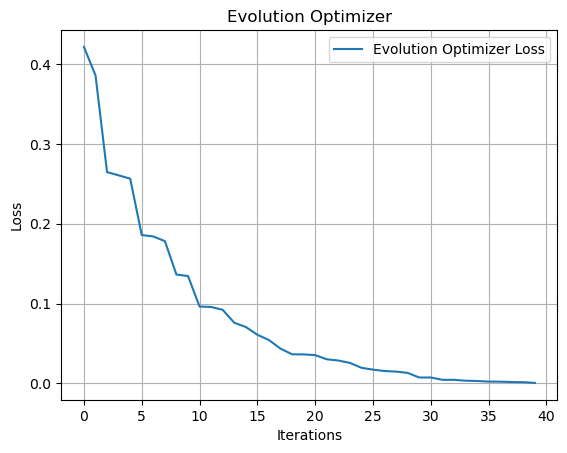

In [20]:
X, y = classification_data(p_dims=200, noise=0.5, n_points=5000)
NN = DeepNeuralNetwork([201, 2])
opt = EvolutionOptimizer(NN)
NN.set_optimizer(opt)
opt.set_mutation_rate(0.5)
opt.set_population_size(30)
opt.set_fitness_ratio(0.25)
opt.diversity_coeff = 0.0
opt.mutation_type = "lap"

print(f'Training on {opt.device}')

device = opt.device
X, y = X.to(device), y.to(device).long()

loss = []
epoch = 1
start = time.time()
while accuracy(NN, X, y) < 1:
    opt.step(X, y)
    loss.append(NN.loss(X, y).item())
    print(f"Epoch {epoch}\n    Accuracy: {accuracy(NN, X, y)}\n    Loss: {loss[-1]}")
    epoch += 1


print("Time taken: ", time.time() - start)
plt.plot(loss, label="Evolution Optimizer Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Evolution Optimizer")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X, y = classification_data(p_dims=200, noise=0.2, n_points=5000)
LR = LogisticRegression()
opt = FitnessOptimizer(LR)
LR.set_optimizer(opt)
opt.set_mutation_rate(0.5)
opt.set_population_size(30)
opt.set_fitness_ratio(0.25)

print(f'Training on {opt.device}')

device = opt.device
X, y = X.to(device), y.to(device)

loss = []
epoch = 1
start = time.time()
while accuracy(LR, X, y) < 1:
    opt.step(X, y)
    loss.append(LR.loss(X, y).item())
    print(f"Epoch {epoch}\n    Accuracy: {accuracy(LR, X, y)}\n    Loss: {loss[-1]}")
    epoch += 1


print("Time taken: ", time.time() - start)
plt.plot(loss, label="Evolution Optimizer Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Evolution Optimizer")
plt.legend()
plt.grid(True)
plt.show()

Running for thresh = 0%
Epoch 1 Loss: 1.4683393239974976 Accuracy: 0.7310000061988831
Epoch 2 Loss: 1.200422763824463 Accuracy: 0.7570000290870667
Epoch 3 Loss: 1.1768416166305542 Accuracy: 0.7590000629425049
Epoch 4 Loss: 1.167415976524353 Accuracy: 0.7580000162124634
Epoch 5 Loss: 1.1478524208068848 Accuracy: 0.7630000114440918
Epoch 6 Loss: 1.1285533905029297 Accuracy: 0.7680000066757202
Epoch 7 Loss: 1.0983656644821167 Accuracy: 0.7640000581741333
Epoch 8 Loss: 1.0845330953598022 Accuracy: 0.7640000581741333
Epoch 9 Loss: 1.003629446029663 Accuracy: 0.7750000357627869
Epoch 10 Loss: 0.9876359105110168 Accuracy: 0.7790000438690186
Epoch 11 Loss: 0.9320585131645203 Accuracy: 0.7820000648498535
Epoch 12 Loss: 0.9320585131645203 Accuracy: 0.7820000648498535
Epoch 13 Loss: 0.9052335619926453 Accuracy: 0.7880000472068787
Epoch 14 Loss: 0.8955107927322388 Accuracy: 0.7860000133514404
Epoch 15 Loss: 0.8779897093772888 Accuracy: 0.7950000166893005
Epoch 16 Loss: 0.8593456745147705 Accuracy:

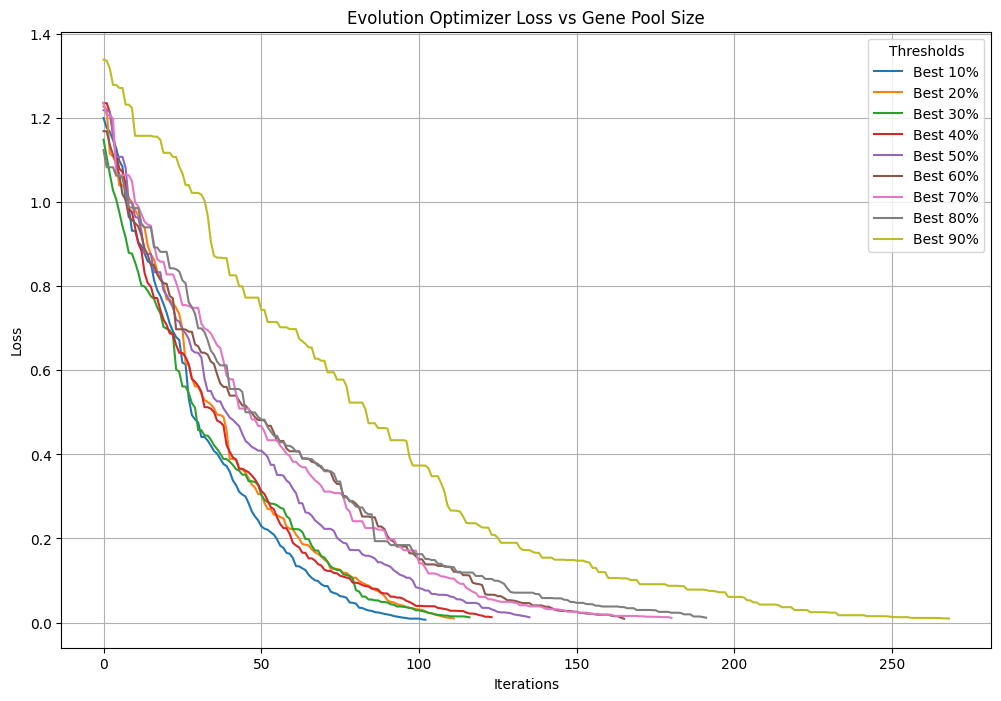

In [12]:
thresh_range = np.arange(0.1, 1.0, 0.1)
loss_dict = {}

for thresh in range(len(thresh_range)):
    print(f"Running for thresh = {thresh*100:.0f}%")
    
    # Generate new data for fairness (or keep it fixed if you prefer)
    X, y = classification_data(p_dims=200, noise=0.8, n_points=1000)
    
    # Set up model and optimizer
    LR = LogisticRegression()
    opt = FitnessOptimizer(LR)
    LR.set_optimizer(opt)
    opt.set_population_size(30)
    opt.set_diversity_coeff(0)
    opt.set_fitness_ratio(thresh_range[thresh])
    
    # Loss tracking
    loss = []
    start = time.time()
    ep = 1
    
    # Optimization loop
    while accuracy(LR, X, y) < 1:
        print(f"Epoch {ep} Loss: {LR.loss(X, y).item()} Accuracy: {accuracy(LR, X, y)}")
        opt.step(X, y)
        loss.append(LR.loss(X, y).item())
        ep+=1
    
    print(f"Finished in {len(loss)} iterations, Time: {round(time.time() - start, 2)}s")
    loss_dict[thresh_range[thresh]] = loss

# Plotting
plt.figure(figsize=(12, 8))
for k, loss in loss_dict.items():
    plt.plot(loss, label=f"Best {k*10:.0f}%")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Evolution Optimizer Loss vs Gene Pool Size")
plt.legend(title="Thresholds")
plt.grid(True)
plt.show()


Running for thresh = 0%
Epoch 1 Loss: 1.6630502939224243 Accuracy: 0.7200000286102295
Epoch 2 Loss: 1.2232170104980469 Accuracy: 0.7590000629425049
Epoch 3 Loss: 1.2293143272399902 Accuracy: 0.7640000581741333
Epoch 4 Loss: 1.1831305027008057 Accuracy: 0.76500004529953
Epoch 5 Loss: 1.1444717645645142 Accuracy: 0.7690000534057617
Epoch 6 Loss: 1.079486608505249 Accuracy: 0.7640000581741333
Epoch 7 Loss: 1.0883983373641968 Accuracy: 0.7560000419616699
Epoch 8 Loss: 1.102231502532959 Accuracy: 0.7720000147819519
Epoch 9 Loss: 1.0447731018066406 Accuracy: 0.7660000324249268
Epoch 10 Loss: 1.0046628713607788 Accuracy: 0.7820000648498535
Epoch 11 Loss: 1.004259467124939 Accuracy: 0.7860000133514404
Epoch 12 Loss: 0.9777315855026245 Accuracy: 0.7790000438690186
Epoch 13 Loss: 0.9810618162155151 Accuracy: 0.7910000085830688
Epoch 14 Loss: 0.9452152252197266 Accuracy: 0.7900000214576721
Epoch 15 Loss: 0.9272032976150513 Accuracy: 0.7850000262260437
Epoch 16 Loss: 0.8799036741256714 Accuracy: 0

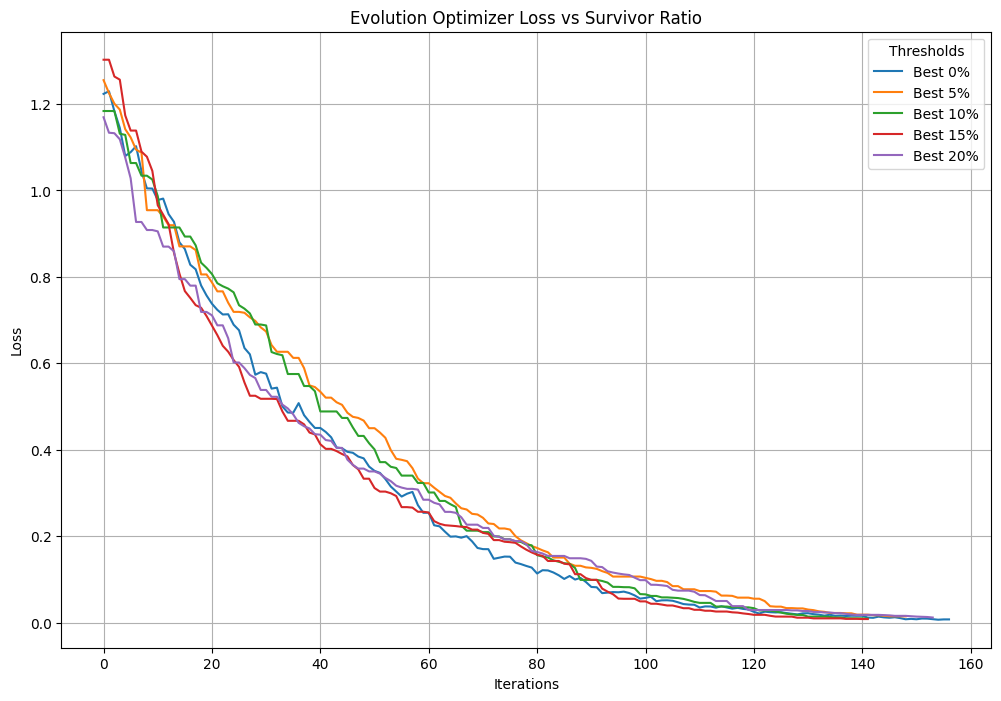

In [9]:
thresh_range = np.arange(0.0, 0.25, 0.05)
loss_dict = {}

for thresh in range(len(thresh_range)):
    print(f"Running for thresh = {thresh_range[thresh]*100:.0f}%")
    
    # Generate new data for fairness (or keep it fixed if you prefer)
    X, y = classification_data(p_dims=200, noise=0.8, n_points=1000)
    
    # Set up model and optimizer
    LR = LogisticRegression()
    opt = FitnessOptimizer(LR)
    LR.set_optimizer(opt)
    opt.set_population_size(30)
    opt.set_diversity_coeff(0)
    opt.set_survivors_ratio(thresh_range[thresh])
    
    # Loss tracking
    loss = []
    start = time.time()
    ep = 1
    
    # Optimization loop
    while accuracy(LR, X, y) < 1:
        print(f"Epoch {ep} Loss: {LR.loss(X, y).item()} Accuracy: {accuracy(LR, X, y)}")
        opt.step(X, y)
        loss.append(LR.loss(X, y).item())
        ep+=1
    
    print(f"Finished in {len(loss)} iterations, Time: {round(time.time() - start, 2)}s")
    loss_dict[thresh_range[thresh]] = loss

# Plotting
plt.figure(figsize=(12, 8))
for k, loss in loss_dict.items():
    plt.plot(loss, label=f"Best {k*100:.0f}%")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Evolution Optimizer Loss vs Survivor Ratio")
plt.legend(title="Thresholds")
plt.grid(True)
plt.show()

Running for thresh = 0%
Epoch 1 Loss: 1.4034714698791504 Accuracy: 0.7329999804496765
Epoch 2 Loss: 1.3501187562942505 Accuracy: 0.7420000433921814
Epoch 3 Loss: 1.3259540796279907 Accuracy: 0.7500000596046448
Epoch 4 Loss: 1.2759361267089844 Accuracy: 0.7560000419616699
Epoch 5 Loss: 1.255828857421875 Accuracy: 0.7470000386238098
Epoch 6 Loss: 1.2394875288009644 Accuracy: 0.7540000081062317
Epoch 7 Loss: 1.2160829305648804 Accuracy: 0.7520000338554382
Epoch 8 Loss: 1.2008583545684814 Accuracy: 0.7540000081062317
Epoch 9 Loss: 1.145492434501648 Accuracy: 0.7620000243186951
Epoch 10 Loss: 1.1196733713150024 Accuracy: 0.7620000243186951
Epoch 11 Loss: 1.0859266519546509 Accuracy: 0.7600000500679016
Epoch 12 Loss: 1.0761525630950928 Accuracy: 0.7670000195503235
Epoch 13 Loss: 1.0294768810272217 Accuracy: 0.76500004529953
Epoch 14 Loss: 1.0285288095474243 Accuracy: 0.7690000534057617
Epoch 15 Loss: 0.9737145900726318 Accuracy: 0.7820000648498535
Epoch 16 Loss: 0.9624141454696655 Accuracy: 

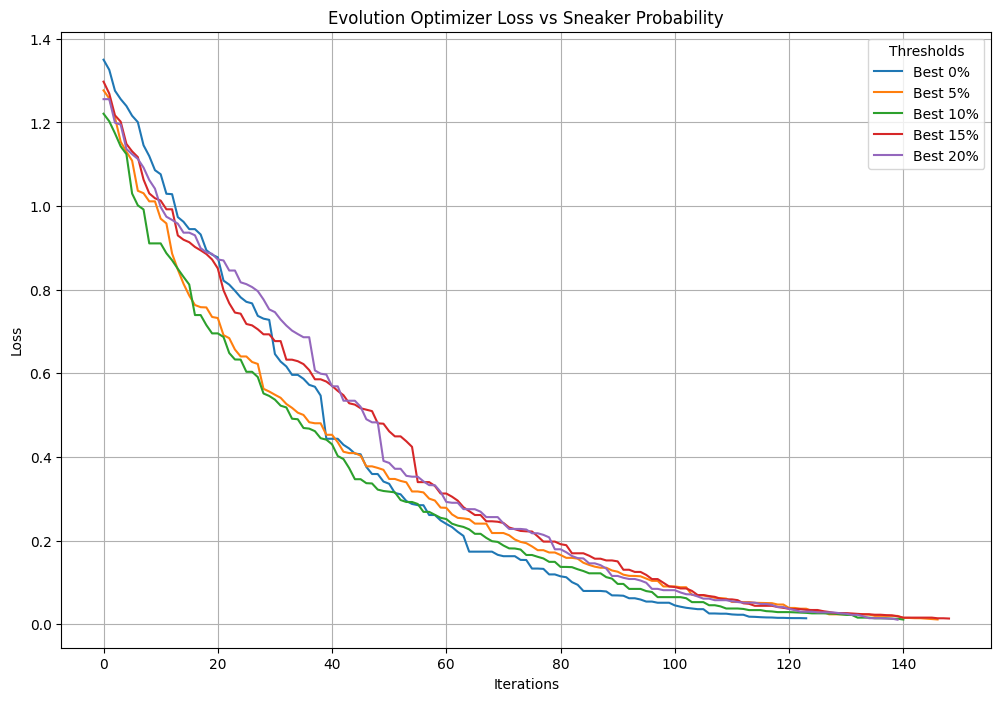

In [8]:
thresh_range = np.arange(0.0, 0.25, 0.05)
loss_dict = {}

for thresh in range(len(thresh_range)):
    print(f"Running for thresh = {thresh_range[thresh]*100:.0f}%")
    
    # Generate new data for fairness (or keep it fixed if you prefer)
    X, y = classification_data(p_dims=200, noise=0.8, n_points=1000)
    
    # Set up model and optimizer
    LR = LogisticRegression()
    opt = FitnessOptimizer(LR)
    LR.set_optimizer(opt)
    opt.set_population_size(30)
    opt.set_diversity_coeff(0)
    opt.set_sneaker_prob(thresh_range[thresh])
    
    # Loss tracking
    loss = []
    start = time.time()
    ep = 1
    
    # Optimization loop
    while accuracy(LR, X, y) < 1:
        print(f"Epoch {ep} Loss: {LR.loss(X, y).item()} Accuracy: {accuracy(LR, X, y)}")
        opt.step(X, y)
        loss.append(LR.loss(X, y).item())
        ep+=1
    
    print(f"Finished in {len(loss)} iterations, Time: {round(time.time() - start, 2)}s")
    loss_dict[thresh_range[thresh]] = loss

# Plotting
plt.figure(figsize=(12, 8))
for k, loss in loss_dict.items():
    plt.plot(loss, label=f"Best {k*100:.0f}%")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Evolution Optimizer Loss vs Sneaker Probability")
plt.legend(title="Thresholds")
plt.grid(True)
plt.show()